<h1>EDA</h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('muestra4s.csv')
print(ds.head(5))

       id   sensor1   sensor2   sensor3   sensor4
0  388937  0.332645  0.312709  0.066802  0.223234
1   90665  0.114415  0.010050  0.043108  0.222393
2   62420  0.089782  0.154589  0.101575  0.090151
3   20018  0.242456  0.101617  0.063159  0.158376
4   57736  0.130230  0.067402  0.066449  0.141199


In [9]:
print('Cantidad de Filas y columnas:',ds.shape)
print('Nombre columnas:',ds.columns)

Cantidad de Filas y columnas: (300, 5)
Nombre columnas: Index(['id', 'sensor1', 'sensor2', 'sensor3', 'sensor4'], dtype='object')


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       300 non-null    int64  
 1   sensor1  300 non-null    float64
 2   sensor2  300 non-null    float64
 3   sensor3  300 non-null    float64
 4   sensor4  300 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [11]:
ds.describe()

id     sensor1     sensor2     sensor3     sensor4
count     300.000000  300.000000  300.000000  300.000000  300.000000
mean   195072.120000    0.203864    0.196685    0.198745    0.202088
std    133924.921824    0.130148    0.203096    0.218348    0.126481
min        14.000000    0.013153    0.004468    0.004946    0.005244
25%     68315.250000    0.107719    0.059639    0.043634    0.105538
50%    195907.500000    0.178133    0.138402    0.115086    0.182516
75%    341503.000000    0.281055    0.254938    0.253272    0.278511
max    396768.000000    0.718866    0.949300    0.962168    0.566642

C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_34088\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_34088\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_34088\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\Abraham-MF\AppData\Local\Temp\ipykernel_34088\2756284331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xt

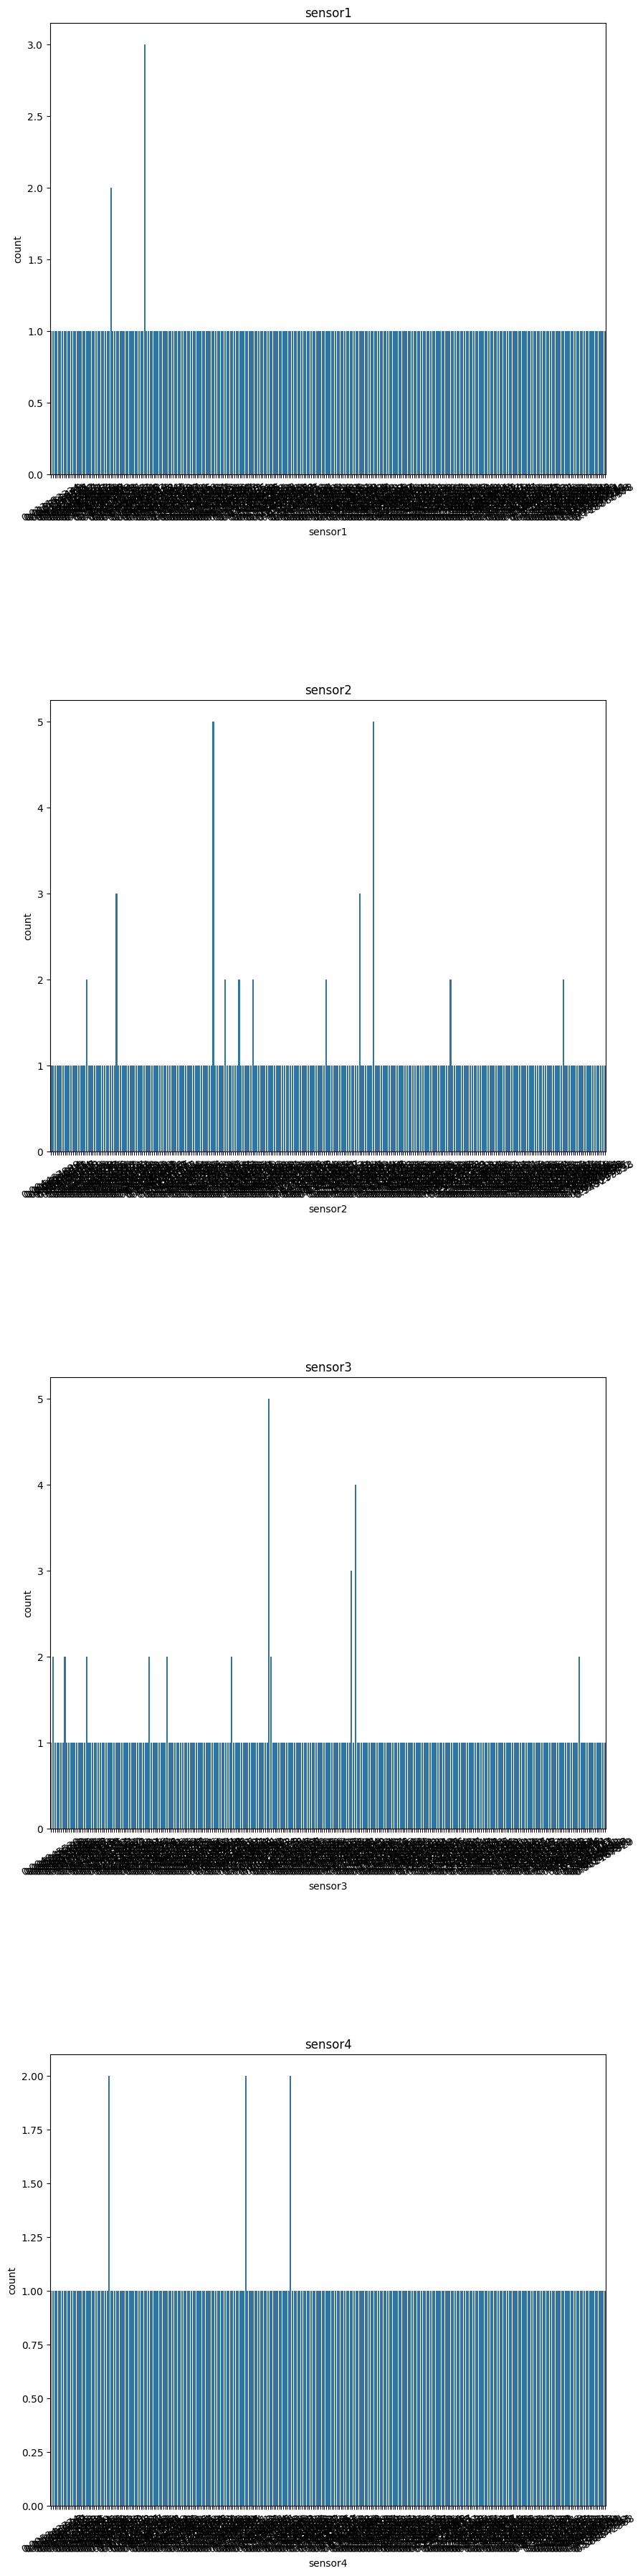

In [20]:
cat = ['sensor1', 'sensor2', 'sensor3', 'sensor4']

fig, ax = plt.subplots(nrows=len(cat), ncols =1, figsize =(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cat):
    sns.countplot(x=col, data=ds, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

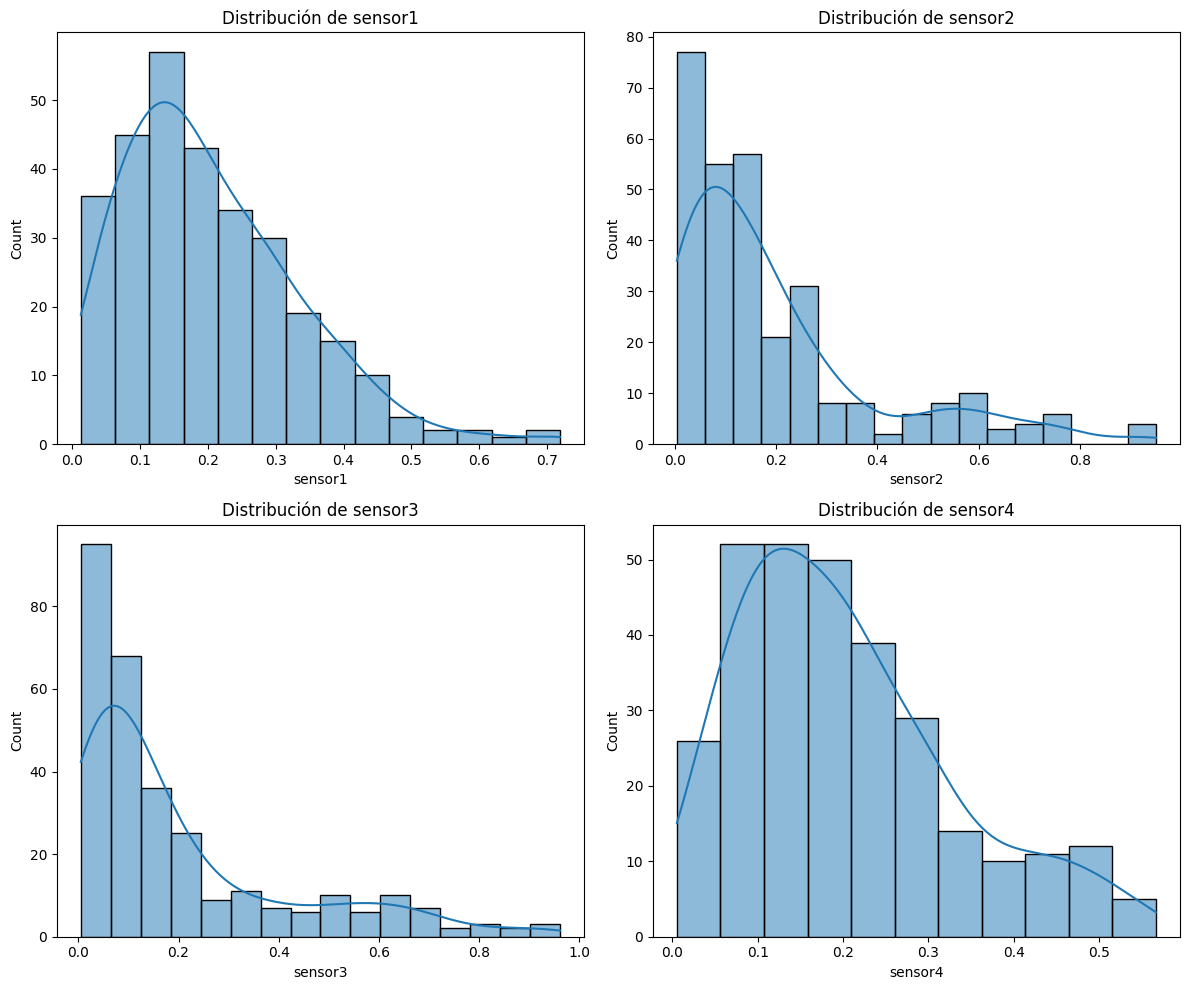

In [13]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(ds.columns[1:], 1):
    plt.subplot(2, 2, i)
    sns.histplot(ds[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

In [14]:
corrl = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].corr()
print("\nMatriz de correlación:")
print(corrl)


Matriz de correlación:
          sensor1   sensor2   sensor3   sensor4
sensor1  1.000000  0.631383  0.620275  0.509346
sensor2  0.631383  1.000000  0.866789  0.457014
sensor3  0.620275  0.866789  1.000000  0.540490
sensor4  0.509346  0.457014  0.540490  1.000000


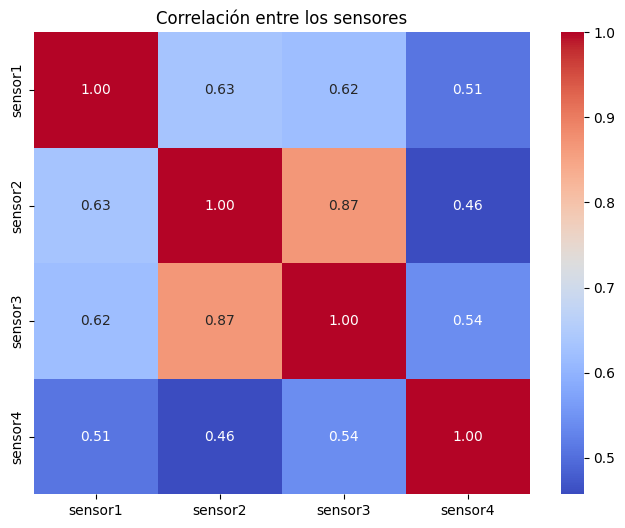

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrl, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlación entre los sensores")
plt.show()

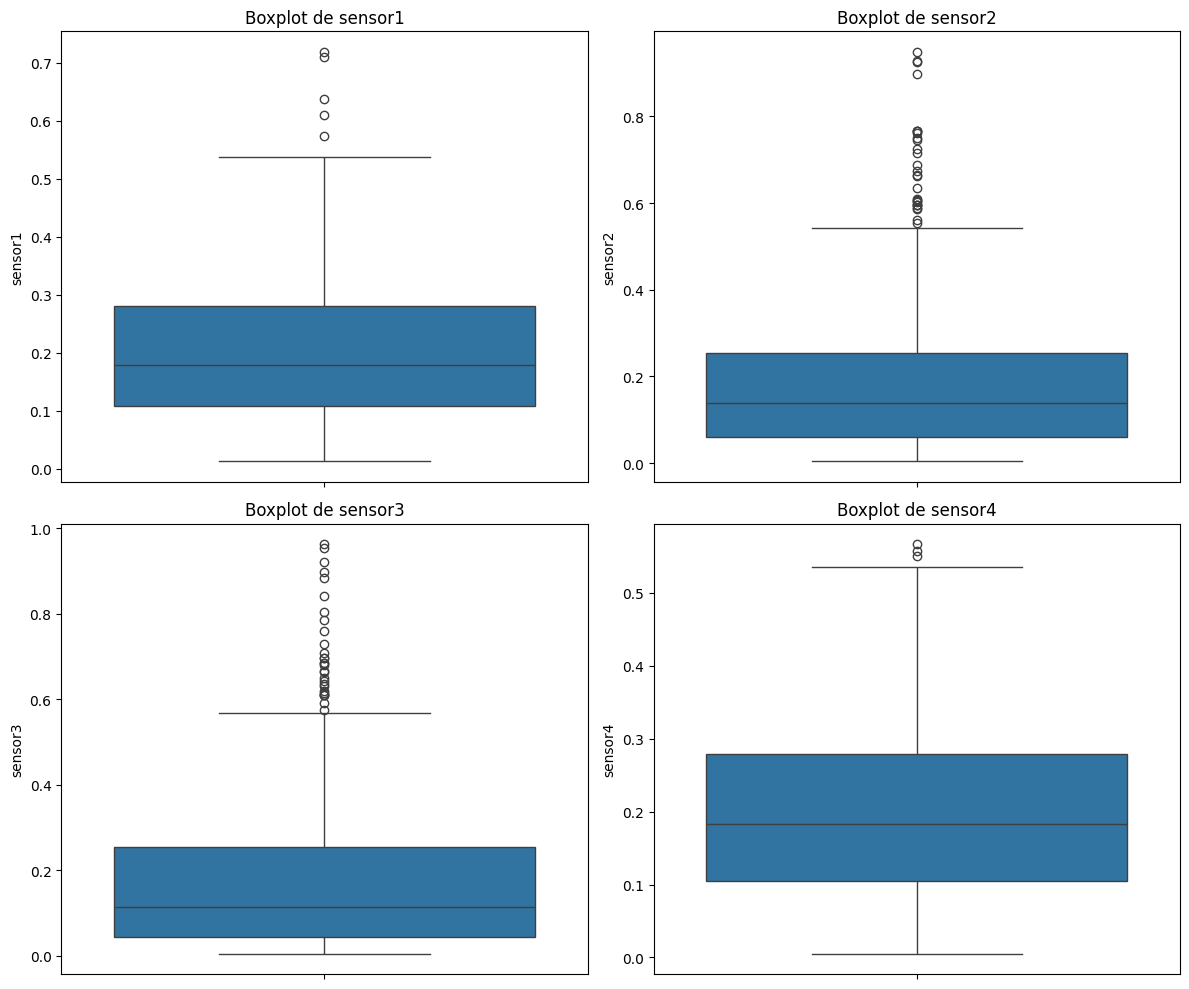

In [16]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(ds.columns[1:], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=ds[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [17]:
Q1 = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].quantile(0.25)
Q3 = ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']] < (Q1 - 1.5 * IQR)) | (ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']] > (Q3 + 1.5 * IQR)))
print("\nvalores atípicos")
print(outliers.sum())


valores atípicos
sensor1     5
sensor2    28
sensor3    29
sensor4     3
dtype: int64


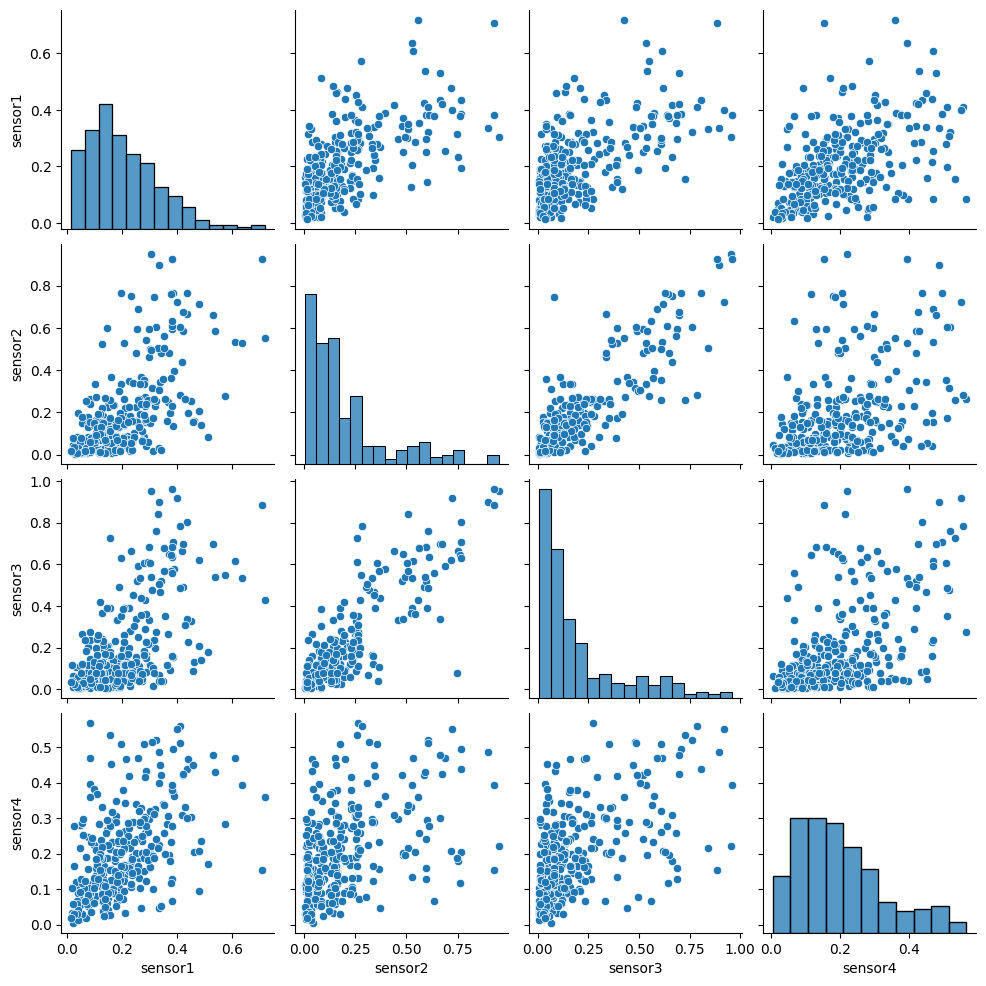

In [18]:
sns.pairplot(ds[['sensor1', 'sensor2', 'sensor3', 'sensor4']])
plt.show()

In [19]:
import math

def Ramas_Hojas(data, dig=2):
    redon = [round(x, dig) for x in data]
    
    ramas = {}
    for num in redon:
        rama = int(num * 10)
        hoja = round(num - rama / 10, dig)
        if rama not in ramas:
            ramas[rama] = []
        ramas[rama].append(hoja)
    
    for rama in sorted(ramas.keys()):
        hojas = sorted(ramas[rama])
        hoja_str = ' '.join(str(hoja) for hoja in hojas)
        print(f"{rama}: {hoja_str}")


Ramas_Hojas(ds['sensor1'].values)

0: 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.09 0.09 0.09
1: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09 0.09
2: 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04

<h1>Transformacion de datos</h1>

<h5>StandarSacaler</h5>

In [101]:
from sklearn.preprocessing import StandardScaler
# Separar la columna 'id' de las características
ids = ds['id']
df_features = ds.drop('id', axis=1)

In [102]:
# 1. Aplicar Estandarización (StandardScaler)
# La estandarización es crucial para algoritmos basados en distancia como k-Means.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_features)

In [103]:
# Convertir el array de vuelta a DataFrame para facilitar el manejo
df_scaled = pd.DataFrame(data_scaled, columns=df_features.columns)

print("--- Primeras 5 filas de los datos escalados (StandardScaler) ---")
print(df_scaled.head())

--- Primeras 5 filas de los datos escalados (StandardScaler) ---
    sensor1   sensor2   sensor3   sensor4
0  0.991147  0.572233 -0.605285  0.167471
1 -0.688440 -0.920485 -0.713982  0.160808
2 -0.878027 -0.207617 -0.445763 -0.886485
3  0.297019 -0.468872 -0.621997 -0.346173
4 -0.566721 -0.637621 -0.606907 -0.482205


In [104]:
# Guardar los datos escalados para su uso posterior
df_scaled.to_csv('muestra4s_scaled.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_scaled.csv'")


Datos escalados guardados en 'muestra4s_scaled.csv'


<h5>PCA</h5>

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
xpca = pca.fit_transform(data_scaled)

# Guardar los datos escalados para su uso posterior
df_pca = pd.DataFrame(xpca, columns=['PC1','PC2','PC3','PC4'])
df_pca.to_csv('muestra4s_PCA.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_PCA.csv'")


Datos escalados guardados en 'muestra4s_PCA.csv'


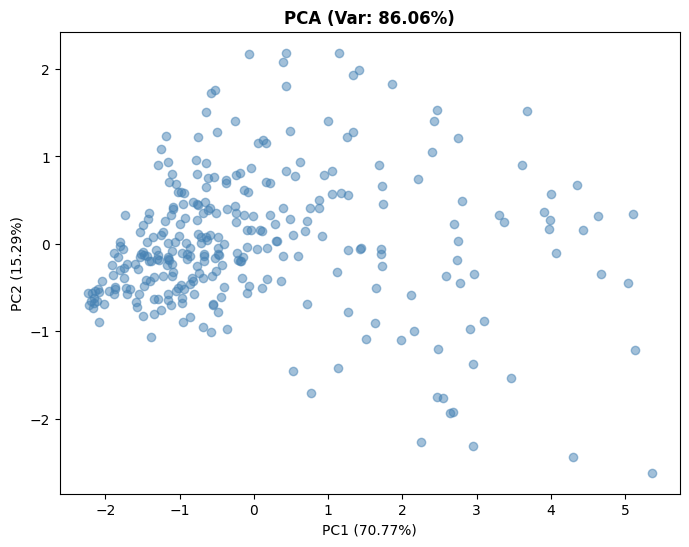

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xpca[:, 0], xpca[:, 1], alpha=0.5, c='steelblue')
ax.set_title(f'PCA (Var: {pca.explained_variance_ratio_[:2].sum():.2%})', fontweight='bold')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.show()

In [110]:
pca2d = PCA(n_components=2)
xpca2d = pca2d.fit_transform(data_scaled)

# Guardar los datos escalados para su uso posterior
df_pca2d = pd.DataFrame(xpca2d, columns=['PC1','PC2'])
df_pca2d.to_csv('muestra4s_PCA_2d.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_PCA_2d.csv'")


Datos escalados guardados en 'muestra4s_PCA_2d.csv'


<h5>ICA</h5>

In [83]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4, random_state=42)
xica = ica.fit_transform(data_scaled)

# Guardar los datos escalados para su uso posterior
df_ica = pd.DataFrame(xica, columns=['IC1','IC2','IC3','IC4'])
df_ica.to_csv('muestra4s_ICA.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_ICA.csv'")


Datos escalados guardados en 'muestra4s_ICA.csv'


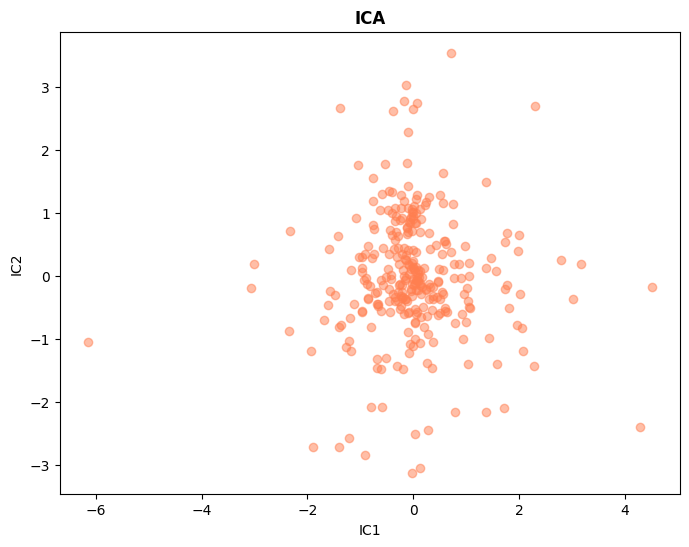

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xica[:, 0], xica[:, 1], alpha=0.5, c='coral')
ax.set_title('ICA', fontweight='bold')
ax.set_xlabel('IC1')
ax.set_ylabel('IC2')
plt.show()

<h5>t-SNE</h5>

In [85]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
xtsne = tsne.fit_transform(data_scaled)

# Guardar los datos escalados para su uso posterior
df_tsne = pd.DataFrame(xtsne, columns=['TSNE1','TSNE2'])
df_tsne.to_csv('muestra4s_tsn.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_tsn.csv'")


Datos escalados guardados en 'muestra4s_tsn.csv'


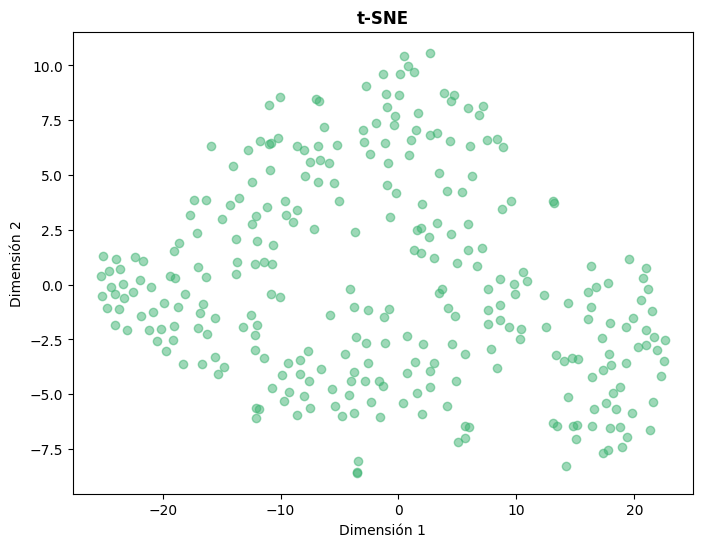

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(xtsne[:, 0], xtsne[:, 1], alpha=0.5, c='mediumseagreen')
ax.set_title('t-SNE', fontweight='bold')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
plt.show()

<h5>Reduccion de ruido</h5>

In [87]:
from sklearn.ensemble import IsolationForest

isof = IsolationForest(contamination=0.5, random_state=42)
outl = isof.fit_predict(data_scaled)
mask = outl ==1
xclean = data_scaled[mask]

df_lim = pd.DataFrame(xclean, columns=df_features.columns)
df_lim.to_csv('muestra4s_scaled_sin_ruido.csv', index=False)
print("\nDatos escalados guardados en 'muestra4s_scaled_sin_ruido.csv'")


Datos escalados guardados en 'muestra4s_scaled_sin_ruido.csv'


<h1>Aprendizaje Automatico</h1>

In [111]:
datasets = {
    "scaled": "muestra4s_scaled.csv",
    "pca": "muestra4s_PCA.csv",
    "pca2d": "muestra4s_PCA_2d.csv",
    "ica": "muestra4s_ICA.csv",
    "tsn": "muestra4s_tsn.csv",
    "s-ruido": "muestra4s_scaled_sin_ruido.csv" 
}

<h4>KMeans</h4>

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Valores de k a probar
k_values = [3, 4, 5, 15]
results = {}

In [113]:
print("--- Implementación de k-Means y Evaluación con Silhouette Score ---")

for name, file in datasets.items():
    df = pd.read_csv(file)
    X = df.values
    
    print(f"\n--- {name.upper()} ---")
    for k in k_values:
        try:
            # Inicializar y entrenar el modelo k-Means
            # n_init='auto' es la configuración recomendada en versiones recientes de scikit-learn
            kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeans.fit(X)
            
            # Obtener las etiquetas de los clusters
            labels = kmeans.labels_
            
            # Calcular el Silhouette Score
            score = silhouette_score(X, labels)
            
            results[k] = score
            print(f"k={k}: Silhouette Score = {score:.4f}")
            
            # Guardar las etiquetas del mejor k (usaremos k=4 como ejemplo para el código)
            if k == 4:
                df_scaled['cluster_k4'] = labels
                df_scaled.to_csv('muestra4s_clustered_k4.csv', index=False)
                print("Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'")
                
        except Exception as e:
            print(f"Error al ejecutar k-Means para k={k}: {e}")

--- Implementación de k-Means y Evaluación con Silhouette Score ---

--- SCALED ---
k=3: Silhouette Score = 0.3384
k=4: Silhouette Score = 0.3148
Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'
k=5: Silhouette Score = 0.2638
k=15: Silhouette Score = 0.2766

--- PCA ---
k=3: Silhouette Score = 0.3384
k=4: Silhouette Score = 0.3148
Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'
k=5: Silhouette Score = 0.2638
k=15: Silhouette Score = 0.2766

--- PCA2D ---
k=3: Silhouette Score = 0.4262
k=4: Silhouette Score = 0.3600
Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'
k=5: Silhouette Score = 0.3510
k=15: Silhouette Score = 0.3516

--- ICA ---
k=3: Silhouette Score = 0.2276
k=4: Silhouette Score = 0.2491
Etiquetas de cluster para k=4 guardadas en 'muestra4s_clustered_k4.csv'
k=5: Silhouette Score = 0.2702
k=15: Silhouette Score = 0.2468

--- TSN ---
k=3: Silhouette Score = 0.4698
k=4: Silhouette Score = 0.4786
Etiquetas de

<h4>Bisecting KMeans</h4>


--- SCALED ---
k=2, silhouette=0.5280
k=3, silhouette=0.2931
k=4, silhouette=0.2820
k=5, silhouette=0.2711
k=6, silhouette=0.2777
k=7, silhouette=0.2790
k=8, silhouette=0.2049
k=9, silhouette=0.2061
k=10, silhouette=0.1944
k=11, silhouette=0.1982
k=12, silhouette=0.2074
k=13, silhouette=0.2002
k=14, silhouette=0.2057
k=15, silhouette=0.2075

--- PCA ---
k=2, silhouette=0.5280
k=3, silhouette=0.2931
k=4, silhouette=0.2820
k=5, silhouette=0.2711
k=6, silhouette=0.2777
k=7, silhouette=0.2790
k=8, silhouette=0.2049
k=9, silhouette=0.2061
k=10, silhouette=0.1944
k=11, silhouette=0.1982
k=12, silhouette=0.2074
k=13, silhouette=0.2002
k=14, silhouette=0.2057
k=15, silhouette=0.2075

--- PCA2D ---
k=2, silhouette=0.5818
k=3, silhouette=0.3707
k=4, silhouette=0.3617
k=5, silhouette=0.3567
k=6, silhouette=0.3692
k=7, silhouette=0.3112
k=8, silhouette=0.3105
k=9, silhouette=0.3162
k=10, silhouette=0.3201
k=11, silhouette=0.3079
k=12, silhouette=0.3258
k=13, silhouette=0.3155
k=14, silhouette=0.3

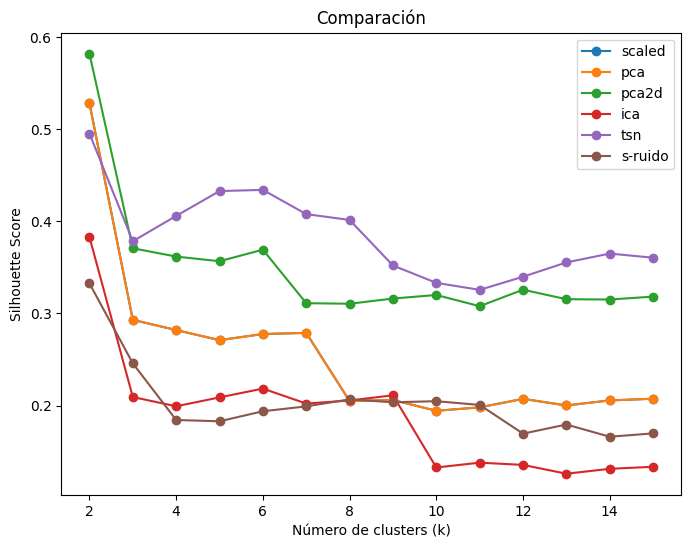

In [121]:
from sklearn.cluster import BisectingKMeans

k_value = range(2, 16)

plt.figure(figsize=(8,6))

for name, file in datasets.items():
    df = pd.read_csv(file)
    X = df.values

    scores = []
    
    print(f"\n--- {name.upper()} ---")
    for k in k_value:
        bc = BisectingKMeans(n_clusters=k, random_state=42)
        lb = bc.fit_predict(X)
        score = silhouette_score(X, lb)
        scores.append(score)
        print(f"k={k}, silhouette={score:.4f}")

    plt.plot(k_value, scores, marker='o', label=name)

plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Comparación")
plt.legend()
plt.show()

<h4>DBSCAN</h4>

scaled                    | ε=0.3, min= 3 | k=9 | Silhouette=0.2358


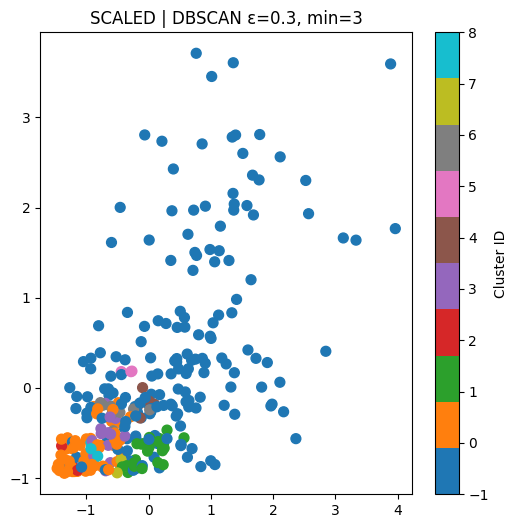

scaled                    | ε=0.3, min= 5 | k=4 | Silhouette=0.4412


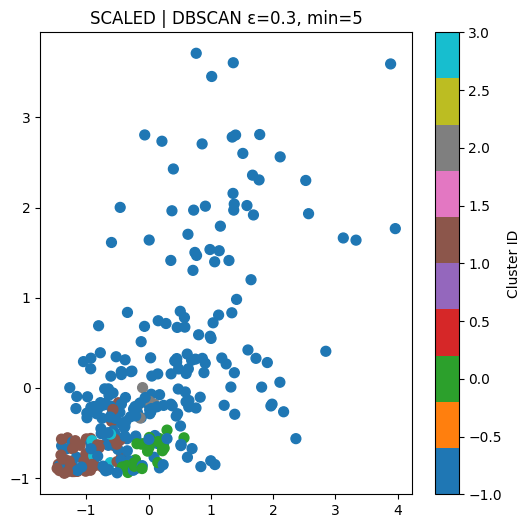

scaled                    | ε=0.3, min= 7 | k=3 | Silhouette=0.3918


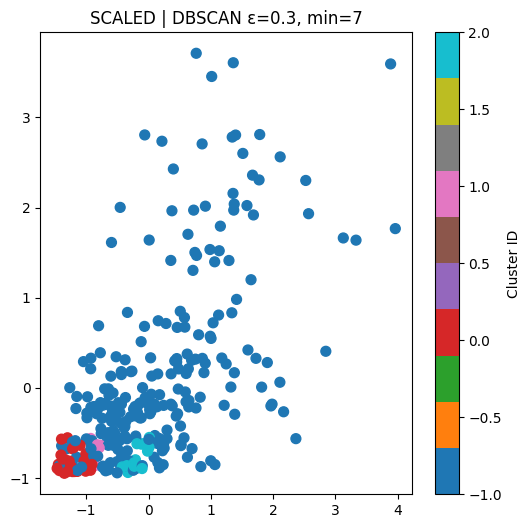

scaled                    | ε=0.4, min= 3 | k=4 | Silhouette=0.0718


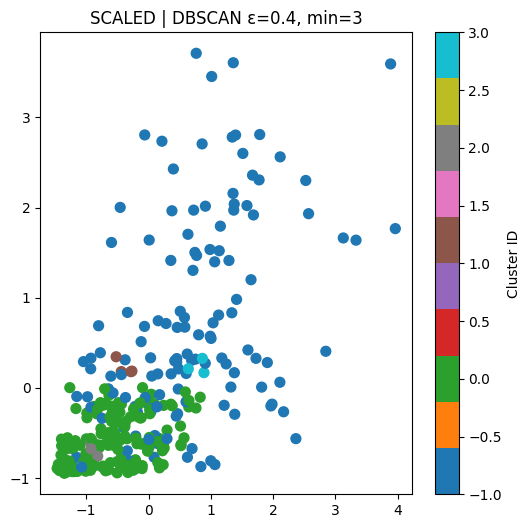

scaled                    | ε=0.4, min= 7 | k=2 | Silhouette=0.2409


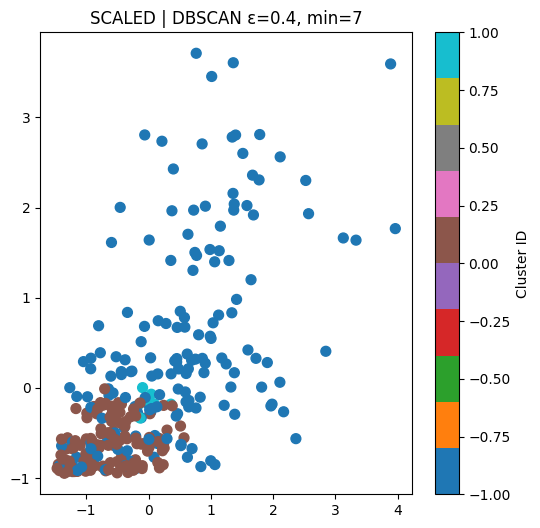

scaled                    | ε=0.5, min= 3 | k=3 | Silhouette=0.1947


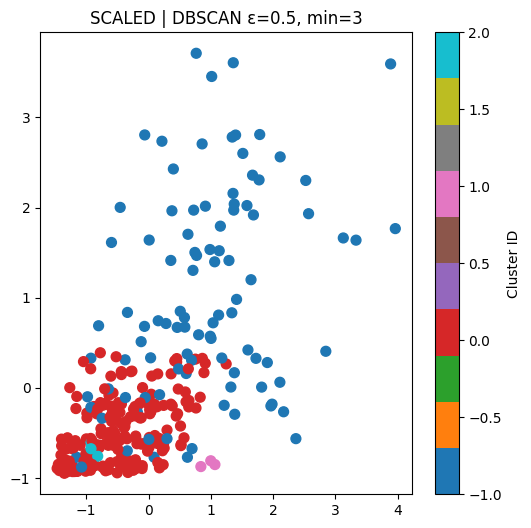

scaled                    | ε=0.6, min= 3 | k=5 | Silhouette=0.1477


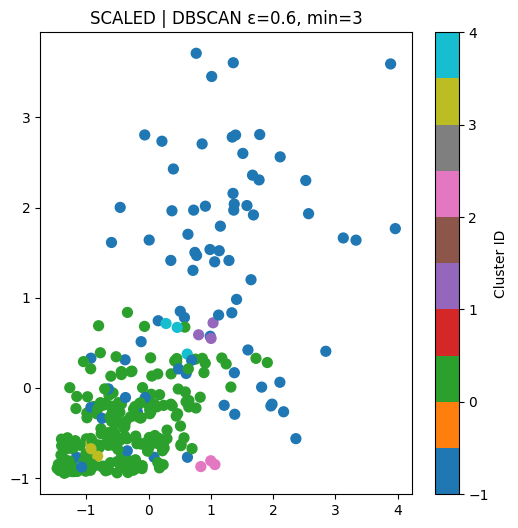

scaled                    | ε=0.7, min= 3 | k=6 | Silhouette=0.3316


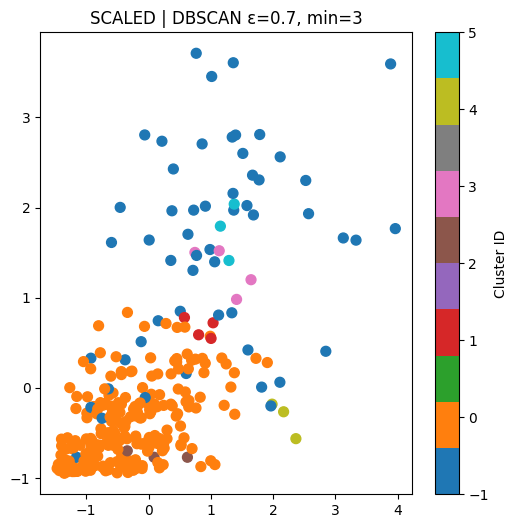

scaled                    | ε=0.8, min= 3 | k=5 | Silhouette=0.3692


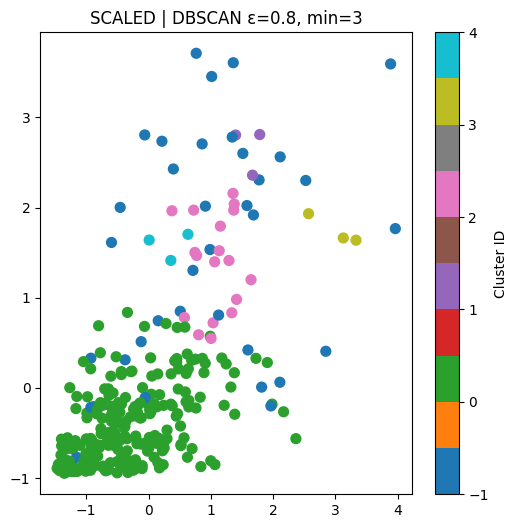

scaled                    | ε=0.8, min= 5 | k=3 | Silhouette=0.5219


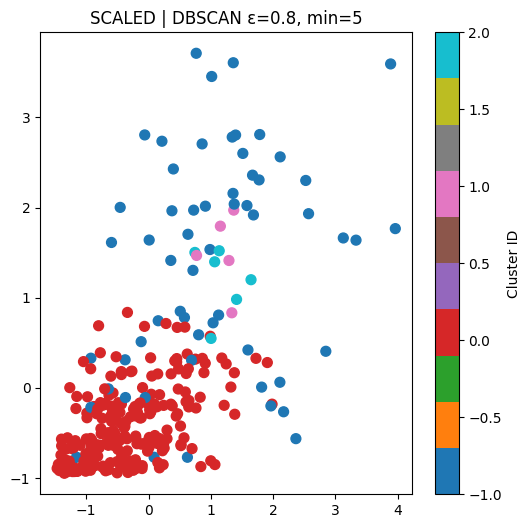

pca                       | ε=0.3, min= 3 | k=9 | Silhouette=0.2358


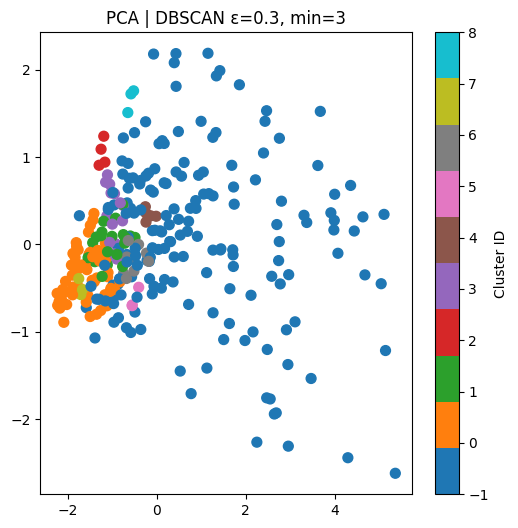

pca                       | ε=0.3, min= 5 | k=4 | Silhouette=0.4412


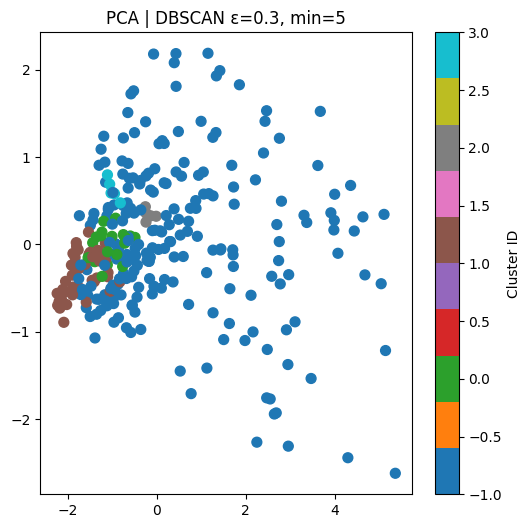

pca                       | ε=0.3, min= 7 | k=3 | Silhouette=0.3918


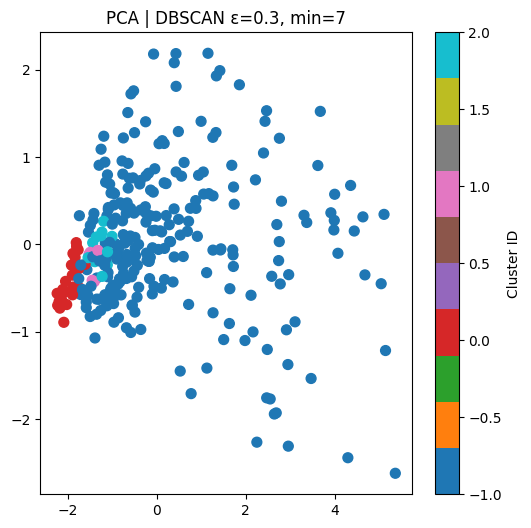

pca                       | ε=0.4, min= 3 | k=4 | Silhouette=0.0718


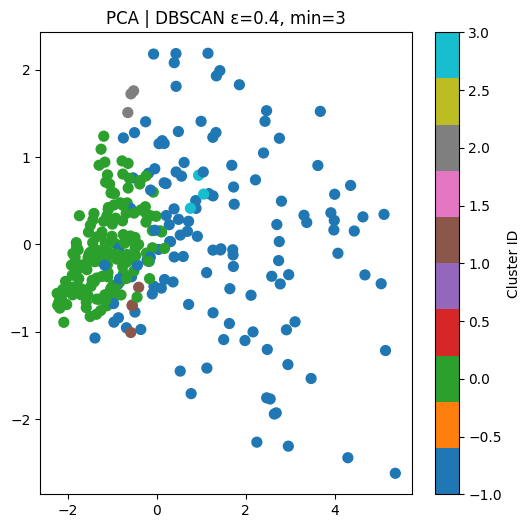

pca                       | ε=0.4, min= 7 | k=2 | Silhouette=0.2409


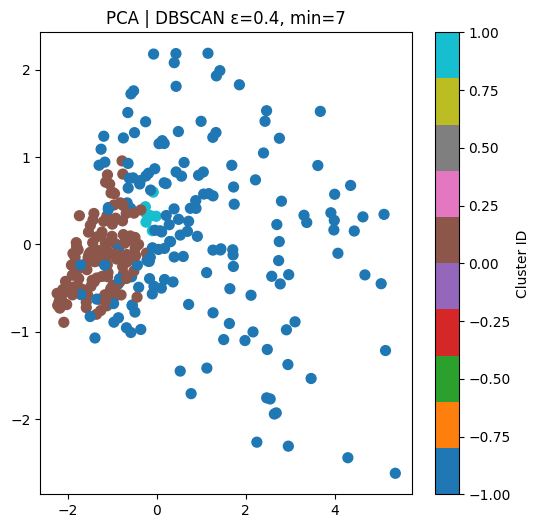

pca                       | ε=0.5, min= 3 | k=3 | Silhouette=0.1947


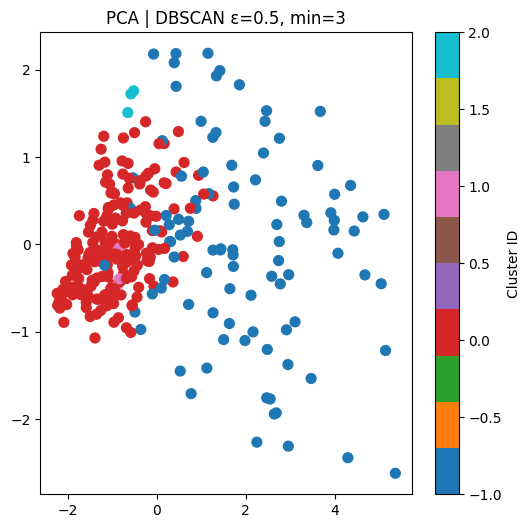

pca                       | ε=0.6, min= 3 | k=5 | Silhouette=0.1477


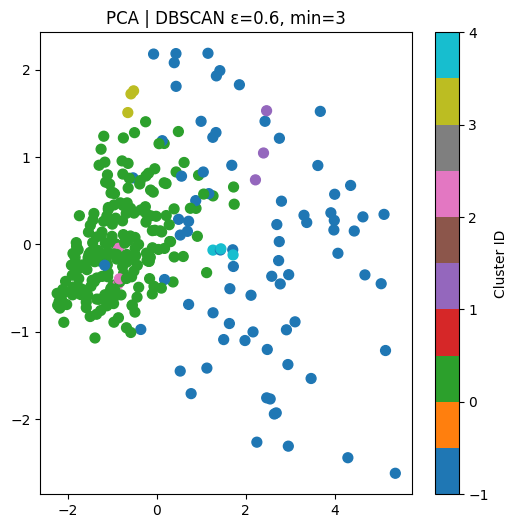

pca                       | ε=0.7, min= 3 | k=6 | Silhouette=0.3316


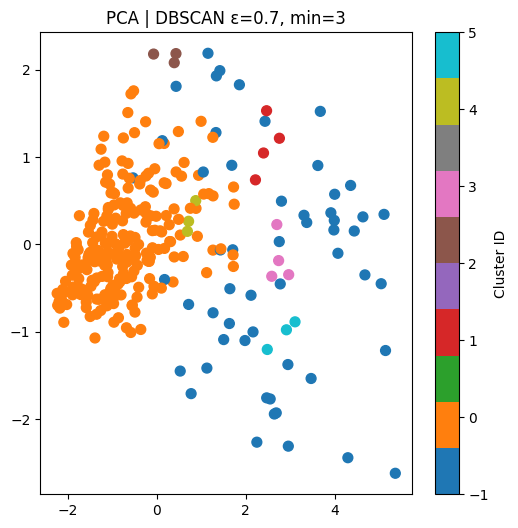

pca                       | ε=0.8, min= 3 | k=5 | Silhouette=0.3692


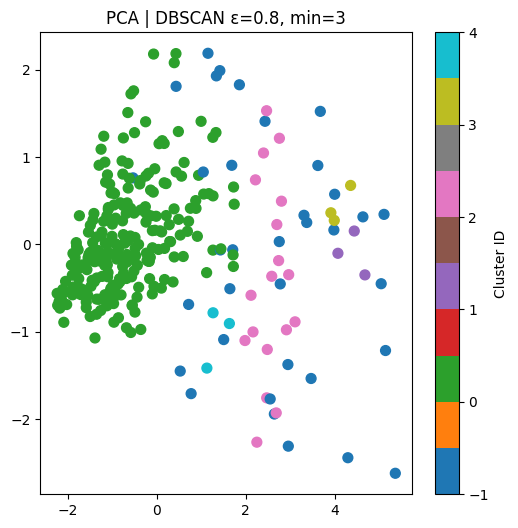

pca                       | ε=0.8, min= 5 | k=3 | Silhouette=0.5219


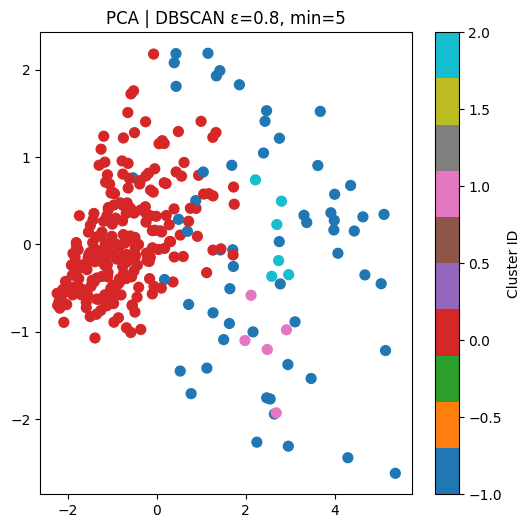

pca2d                     | ε=0.3, min= 3 | k=8 | Silhouette=0.2655


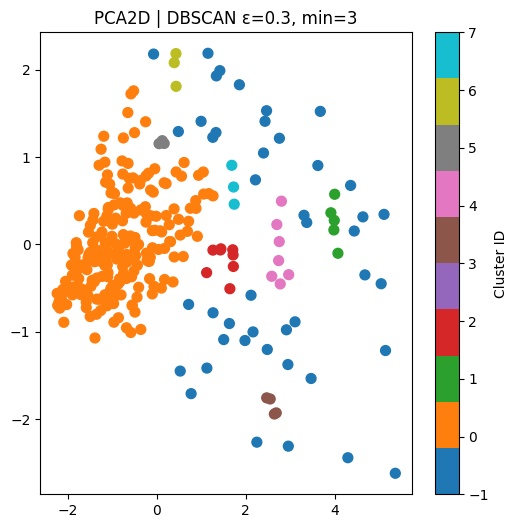

pca2d                     | ε=0.3, min= 5 | k=3 | Silhouette=0.4802


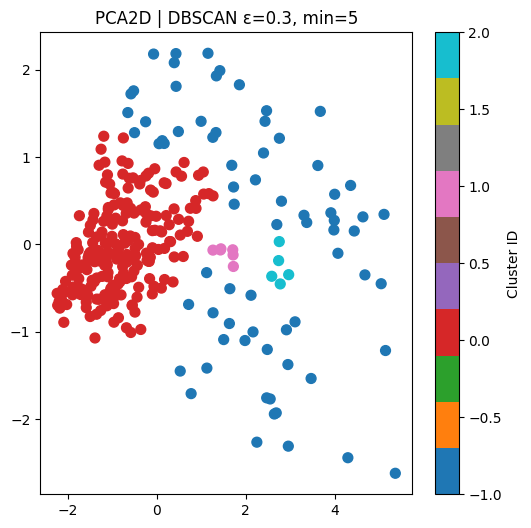

pca2d                     | ε=0.3, min= 7 | k=2 | Silhouette=0.4496


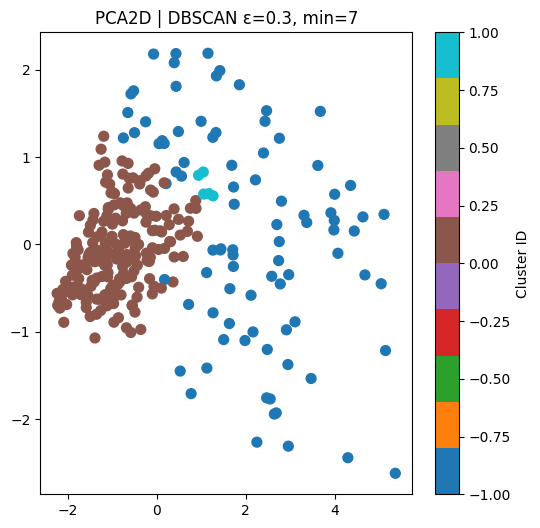

pca2d                     | ε=0.4, min= 3 | k=11 | Silhouette=0.3721


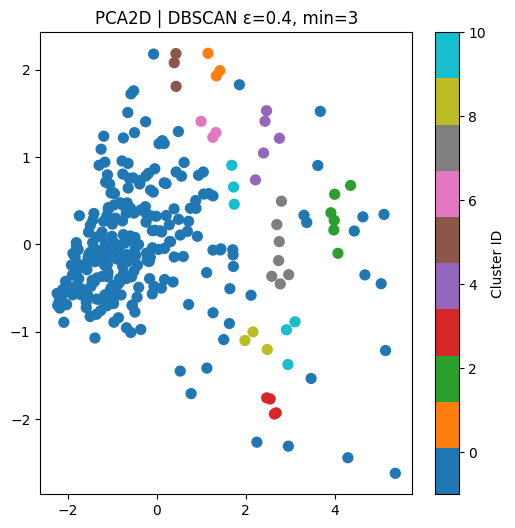

pca2d                     | ε=0.4, min= 5 | k=3 | Silhouette=0.6050


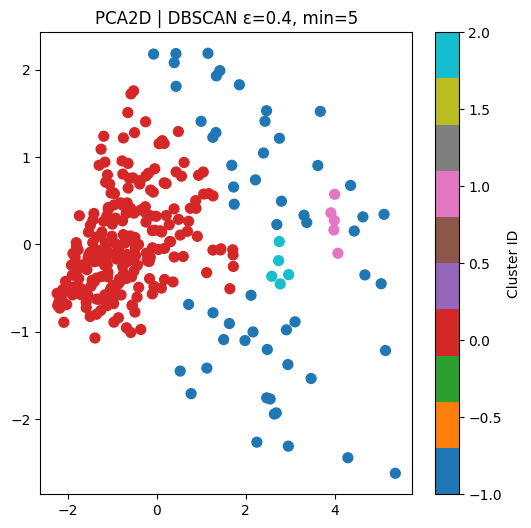

pca2d                     | ε=0.5, min= 3 | k=6 | Silhouette=0.3005


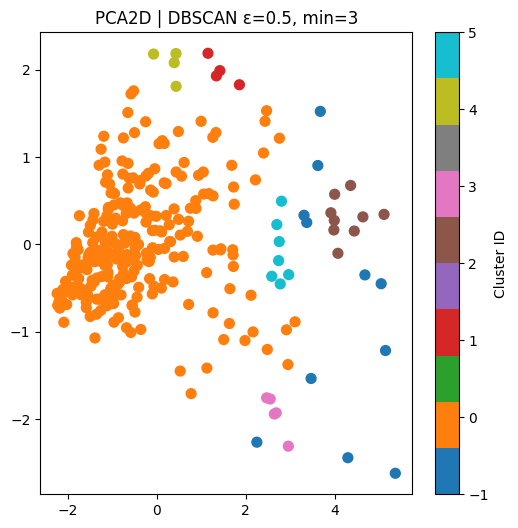

pca2d                     | ε=0.5, min= 5 | k=5 | Silhouette=0.5298


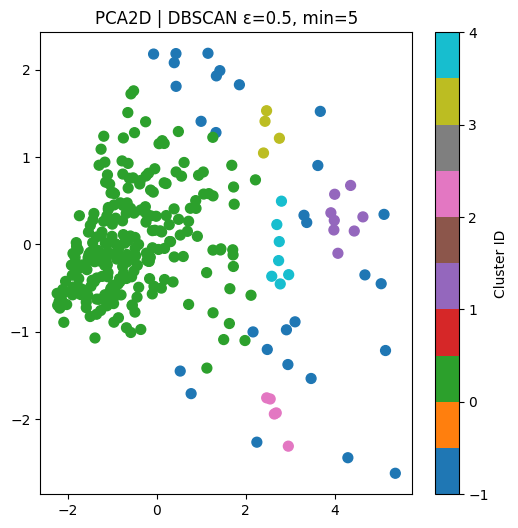

pca2d                     | ε=0.5, min= 7 | k=2 | Silhouette=0.5696


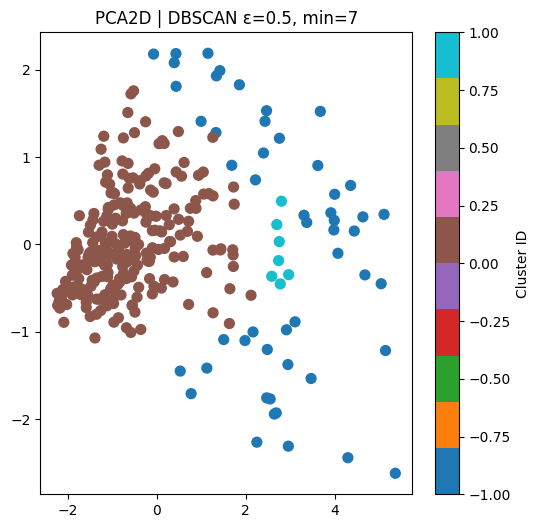

pca2d                     | ε=0.6, min= 3 | k=2 | Silhouette=0.2774


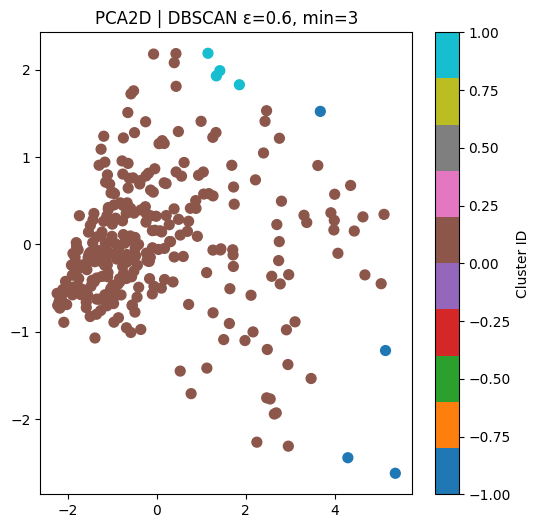

pca2d                     | ε=0.6, min= 5 | k=2 | Silhouette=0.5554


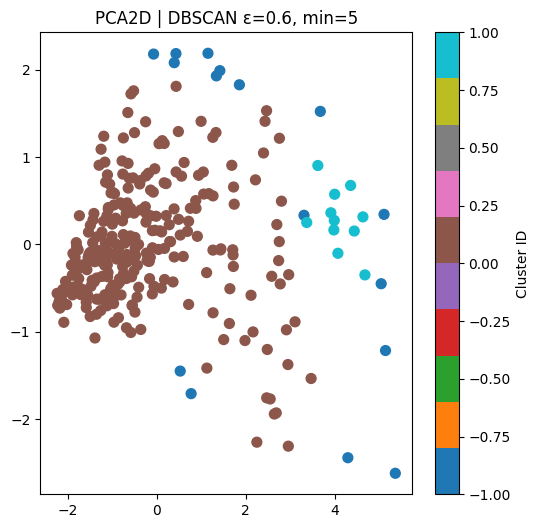

pca2d                     | ε=0.6, min= 7 | k=4 | Silhouette=0.5248


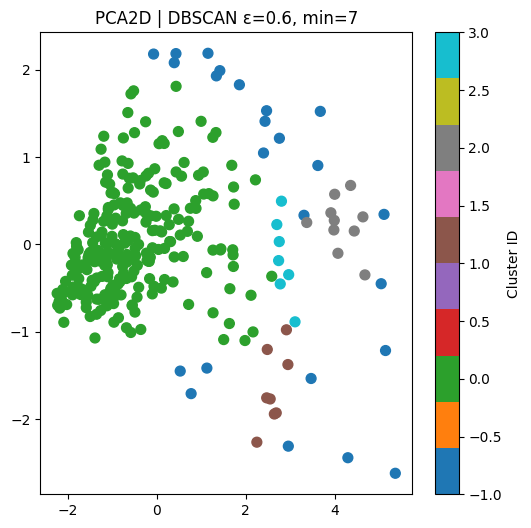

pca2d                     | ε=0.7, min=10 | k=2 | Silhouette=0.6632


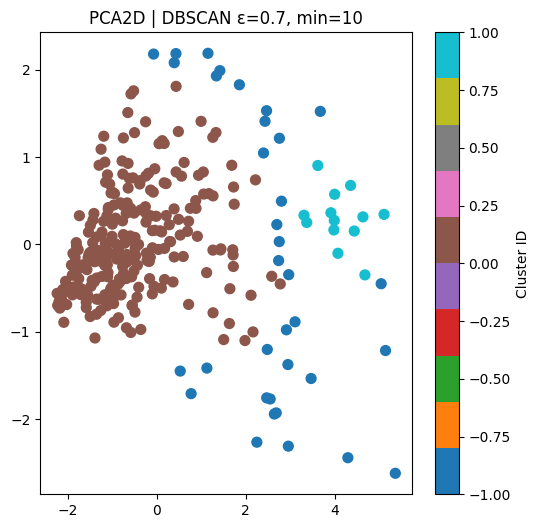

ica                       | ε=0.3, min= 3 | k=6 | Silhouette=0.3372


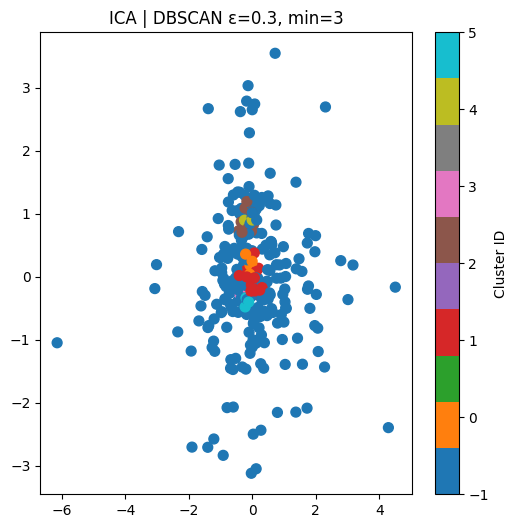

ica                       | ε=0.3, min= 5 | k=5 | Silhouette=0.2870


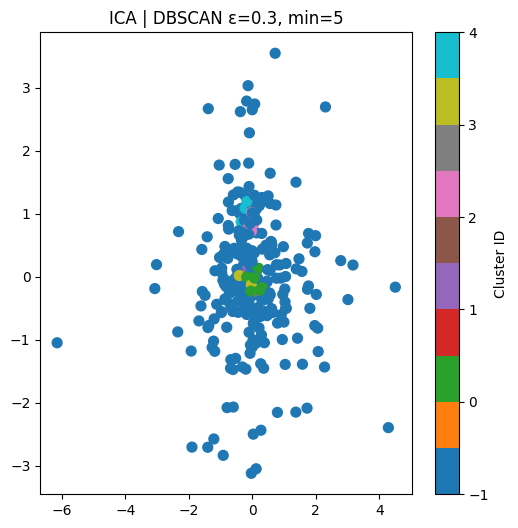

ica                       | ε=0.4, min= 3 | k=9 | Silhouette=0.1478


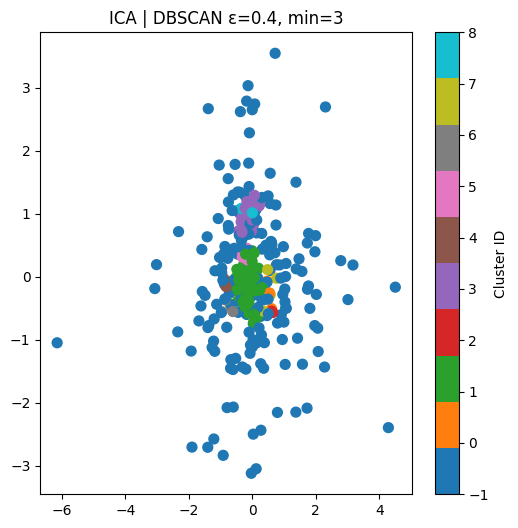

ica                       | ε=0.4, min= 5 | k=3 | Silhouette=0.3781


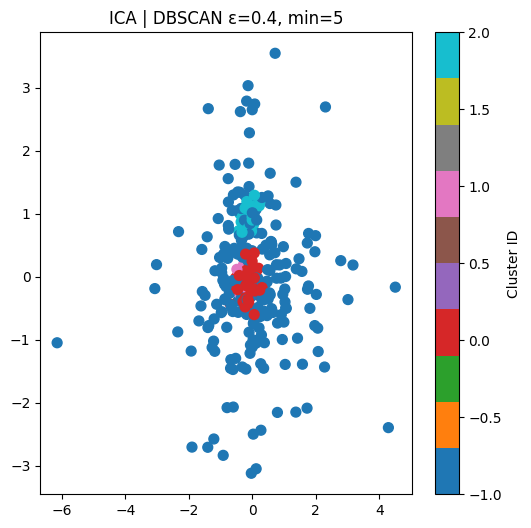

ica                       | ε=0.4, min= 7 | k=2 | Silhouette=0.4912


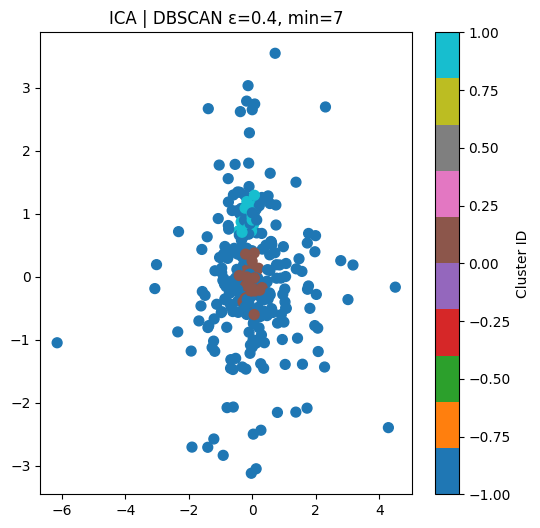

ica                       | ε=0.5, min= 3 | k=5 | Silhouette=0.1148


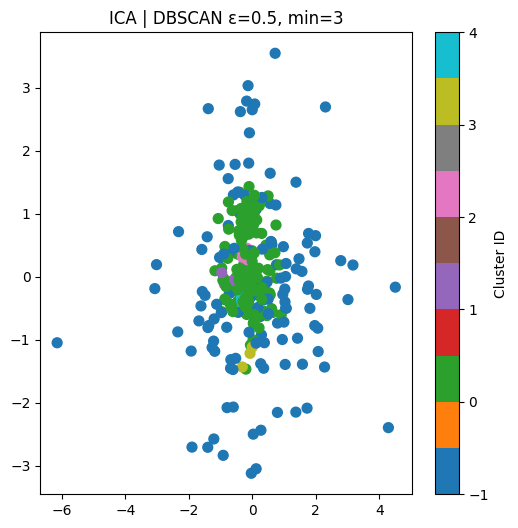

ica                       | ε=0.6, min= 3 | k=3 | Silhouette=0.0541


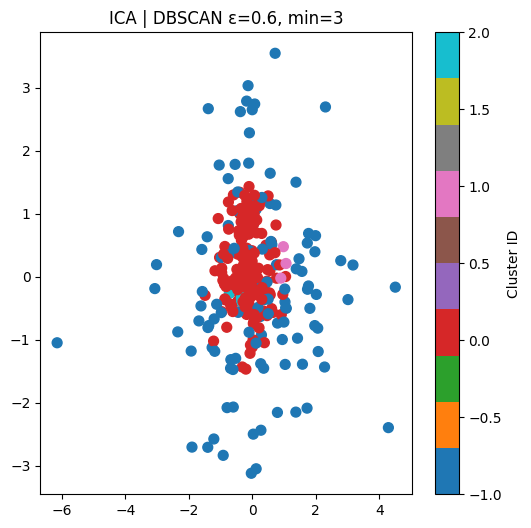

ica                       | ε=0.7, min= 3 | k=2 | Silhouette=0.3977


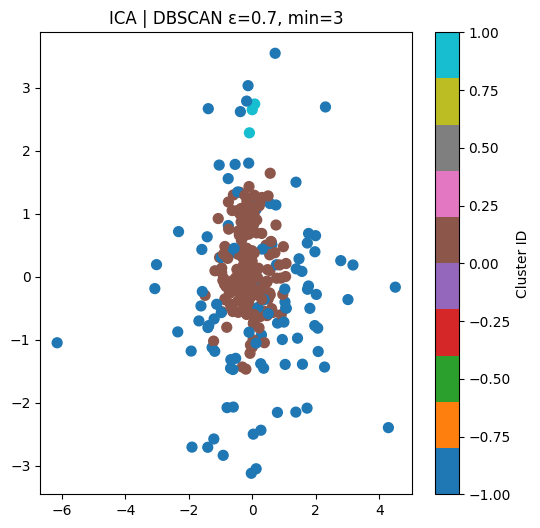

ica                       | ε=0.8, min= 3 | k=3 | Silhouette=0.0978


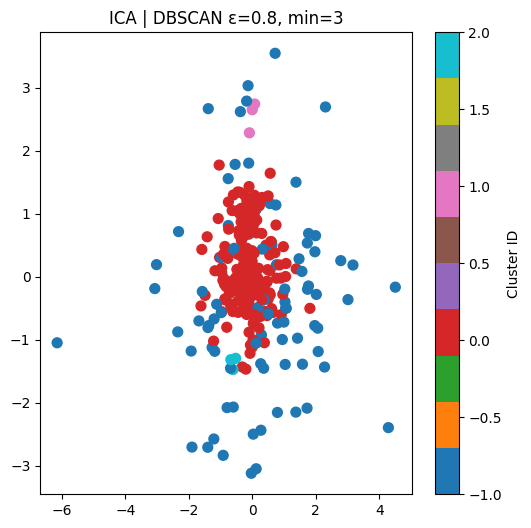

tsne                      | ε=0.6, min= 3 | k=3 | Silhouette=0.9524


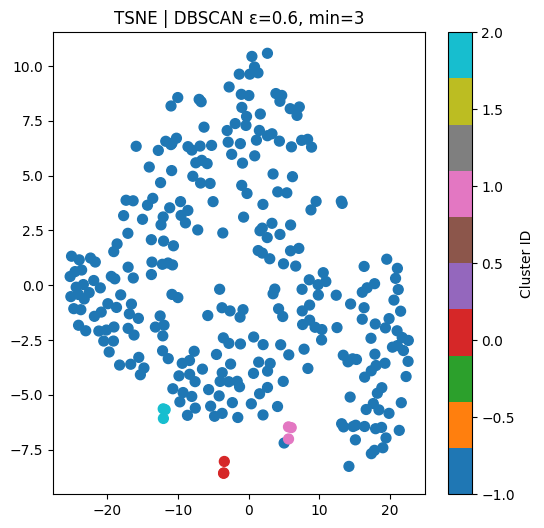

tsne                      | ε=0.7, min= 3 | k=14 | Silhouette=0.8252


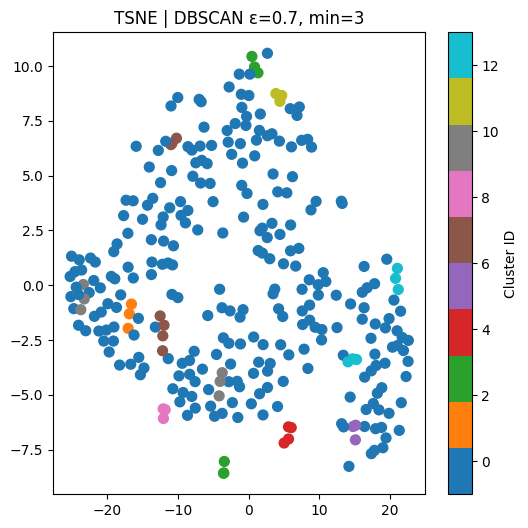

tsne                      | ε=0.8, min= 3 | k=27 | Silhouette=0.6957


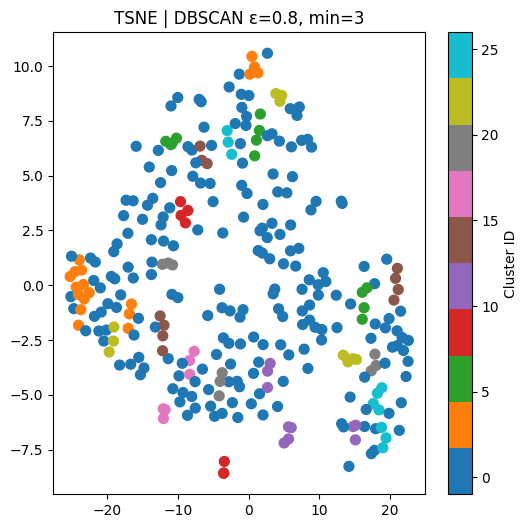

s-ruido                   | ε=0.3, min= 3 | k=6 | Silhouette=0.3317


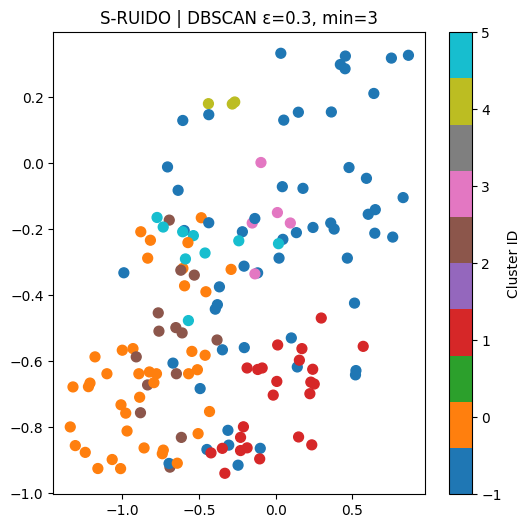

s-ruido                   | ε=0.3, min= 5 | k=4 | Silhouette=0.4464


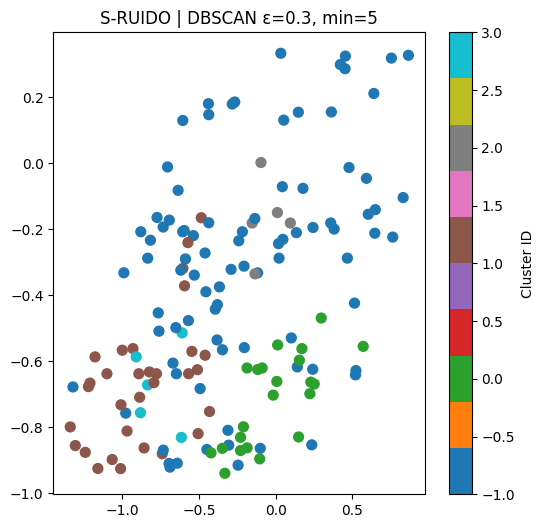

s-ruido                   | ε=0.3, min= 7 | k=3 | Silhouette=0.4328


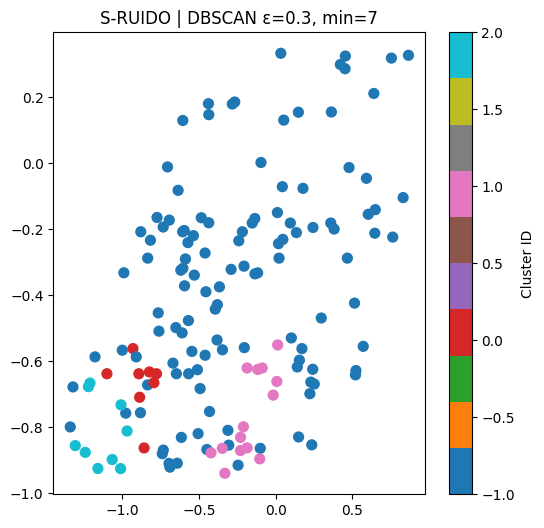

s-ruido                   | ε=0.4, min= 3 | k=2 | Silhouette=0.0742


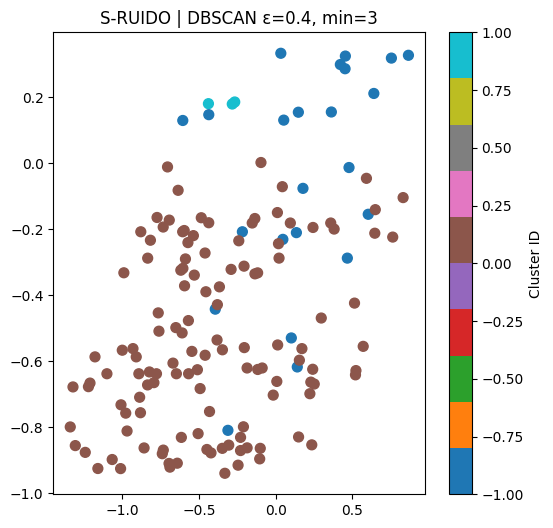

s-ruido                   | ε=0.4, min= 7 | k=2 | Silhouette=0.2480


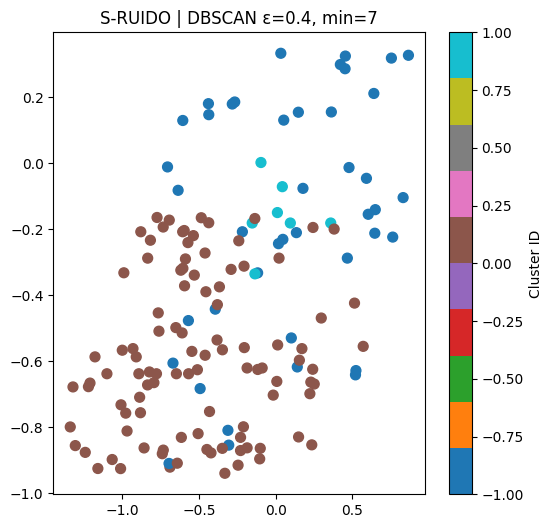

In [139]:
eps_val = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samplesval = [3, 5, 7, 10]

results = []

for name, dataset in datasets.items():
    for eps in eps_val:
        for min_samples in min_samplesval:
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(dataset)
                clusters = len(set(labels)) - (1 if -1 in labels else 0)

                if clusters >= 2 and len(set(labels[labels != -1])) >= 2:
                    mask = labels != -1
                    if mask.sum() > 1:
                        score = silhouette_score(dataset[mask], labels[mask])
                        results.append({
                            'Algoritmo': f'DBSCAN (ε={eps}, min={min_samples})',
                            'Dataset': name,
                            'K': clusters,
                            'Silhouette': score,
                            'Labels': labels,
                            'Data': dataset
                        })
                        print(f"{name:25} | ε={eps:.1f}, min={min_samples:2} | k={clusters} | Silhouette={score:.4f}")
                        
                        plt.figure(figsize=(6, 6))
                        plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='tab10', s=50)
                        plt.title(f"{name.upper()} | DBSCAN ε={eps}, min={min_samples}")
                        plt.colorbar(label="Cluster ID")
                        plt.show()
            except Exception as e:
                print(f"Error en {name} con ε={eps}, min={min_samples}: {e}")